## Try to augment audio data

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
wav, sr = librosa.load("sample.flac", sr=16000)
ipd.Audio(wav, rate=sr)

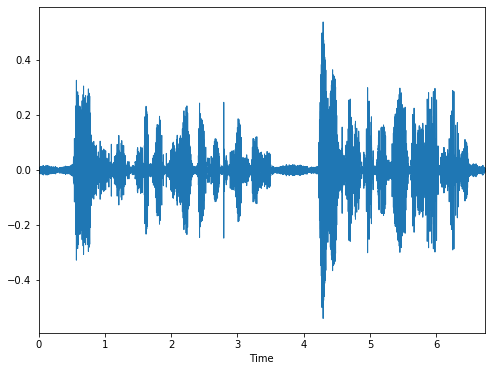

In [3]:
plt.figure(figsize=(8, 6))
librosa.display.waveplot(wav, sr)
plt.show()

### Methods  
1. Random Noise  
2. Change Pitch  
3. Change Speed

In [4]:
# code from https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6
class AudioAugmentation:
    def __init__(self, wav, sr):
        self.audio_wav = wav.copy()
        self.audio_sr = sr
        self.audio_processed = wav.copy()
        self.title = "Original"
        
    def add_noise(self, factor=0.05):
        noise = np.random.randn(len(self.audio_processed))
        augmented = noise * factor + self.audio_processed
        self.audio_processed = augmented.astype(self.audio_processed.dtype)
        self.title += " + Noise"
        
    def change_pitch(self, factor):
        self.audio_processed = librosa.effects.pitch_shift(self.audio_processed, self.audio_sr, factor)
        self.title += " + Pitch Shift"
        
    def change_speed(self, factor):
        self.audio_processed = librosa.effects.time_stretch(self.audio_processed, factor)
        self.title += " + Speed Change"
        
    def reset(self):
        self.audio_processed = self.audio_wav.copy()
        self.title = "Original"
        
    def play(self):
        return ipd.Audio(self.audio_processed, rate=self.audio_sr)
    
    def plot(self):
        plt.figure(figsize=(8,6))
        librosa.display.waveplot(self.audio_processed, self.audio_sr)
        plt.title(self.title)
        plt.show()

In [5]:
audio = AudioAugmentation(wav, sr)

### Test 1: Pure Noise (Find the best interval)

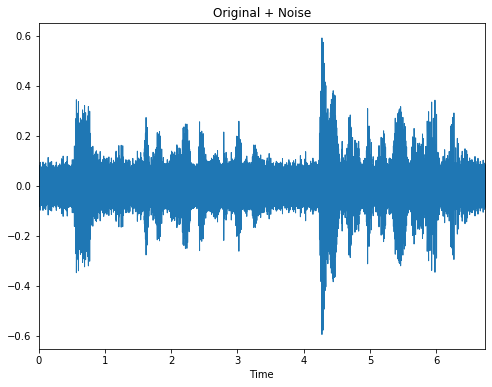

In [6]:
audio.reset()
audio.add_noise(factor=0.03)
audio.plot()
audio.play()

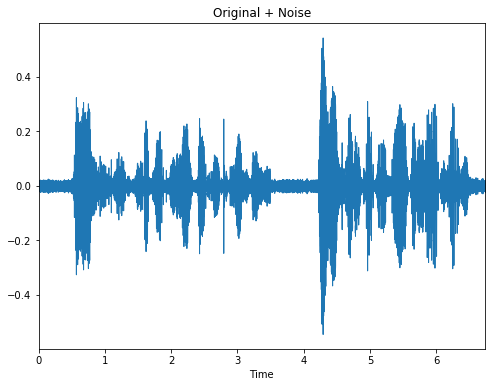

In [7]:
audio.reset()
audio.add_noise(factor=0.005)
audio.plot()
audio.play()

pure noise: factor from 0.005 to 0.03

### Test 2: Pure Speed Change

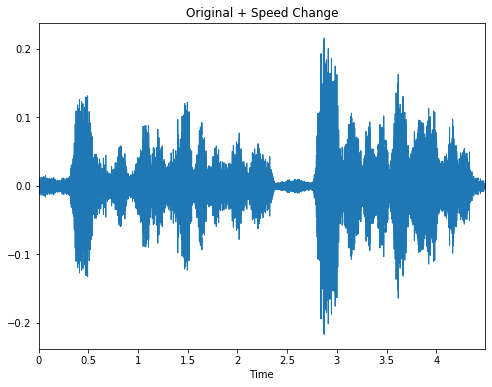

In [8]:
audio.reset()
audio.change_speed(factor=1.5)
audio.plot()
audio.play()

speed change: from 1.0 to 1.5  
need to be causious with output length

### Test 3: Pure Pitch Shift

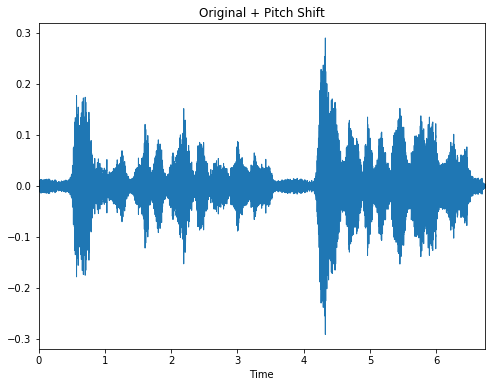

In [9]:
audio.reset()
audio.change_pitch(factor=0.5)
audio.plot()
audio.play()

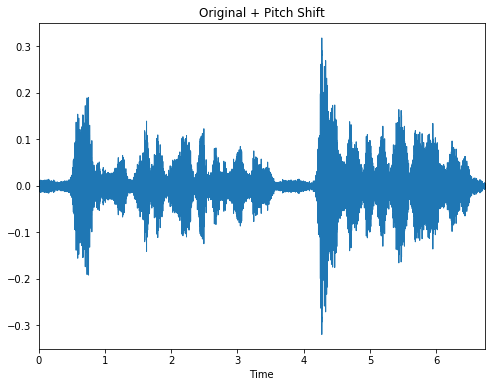

In [10]:
audio.reset()
audio.change_pitch(factor=2.0)
audio.plot()
audio.play()

pure pitch shift: from 0.5 to 2.0

### Test 4: Performance Test

In [11]:
import time

In [12]:
data = [AudioAugmentation(wav, sr) for _ in range(256)]

In [13]:
[x.reset() for x in data]
start = time.time()
[x.add_noise(factor=0.01) for x in data]
time.time() - start

0.6497008800506592

In [14]:
[x.reset() for x in data]
start = time.time()
[x.change_pitch(factor=1.5) for x in data]
time.time() - start

33.12810158729553

In [15]:
[x.reset() for x in data]
start = time.time()
[x.change_speed(factor=1.2) for x in data]
time.time() - start

12.049602270126343

## Conclusion  
1. Best option is Random Noise  
2. Speed change is preferred over pitch shift  
3. Can use random noise with 2 other methods at same time  

In [16]:
import math
import random
def audio_augment(wav):
    new_wav = wav.copy()
    if random.randint(1, 100) <= 50: # 50% possibility of noise
        noise = np.random.randn(len(wav)) * np.random.uniform(0.005, 0.03)
        new_wav = (noise + new_wav).astype(wav.dtype)
        new_rnd = random.randint(1, 100)
        if new_rnd <= 20: # 10% possibility of using more methods
            if new_rnd <= 5: # 2.5% possibility of pitch change
                new_wav = librosa.effects.pitch_shift(new_wav, 16000, np.random.uniform(0.5, 2.0))
            else: # 7.5% possibility of speech change
                new_wav = librosa.effects.time_stretch(new_wav, np.random.uniform(1.0, 1.5))
    return new_wav

### Performance Test

In [17]:
data = [wav for _ in range(256)]
time_all = []
for _ in range(30):
    start = time.time()
    [audio_augment(x) for x in data]
    time_all.append(time.time() - start)
print(time_all)
sum(time_all) / len(time_all)

[2.368727922439575, 1.6568007469177246, 2.366743803024292, 2.4776134490966797, 2.0854430198669434, 1.8283250331878662, 2.619616985321045, 2.1426758766174316, 1.6510040760040283, 2.1547892093658447, 2.283215284347534, 2.2102298736572266, 1.7958142757415771, 2.559210777282715, 2.325819969177246, 2.037933349609375, 2.57037615776062, 2.054403781890869, 2.141322374343872, 2.1356940269470215, 1.5074021816253662, 2.8483474254608154, 2.8446474075317383, 2.1942451000213623, 2.331606864929199, 2.2621185779571533, 2.0791447162628174, 2.3563997745513916, 2.1732537746429443, 2.1004910469055176]


2.205447228749593

In [18]:
ipd.Audio(audio_augment(wav), rate=16000)